In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')

snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_497.h5py', 'r')

cm0   = snap['subhalo_000/Center'].value
r200_0 = snap['subhalo_000/R200'].value
aexp0 = snap['subhalo_000/Time'].value

pstr0 = snap['subhalo_000/Str/Coordinates'].value
mstr0 = snap['subhalo_000/Str/Masses'].value
vel0  = snap['subhalo_000/Str/Velocities'].value
#-----
cm1   = snap['subhalo_001/Center'].value
r200_1 = snap['subhalo_001/R200'].value
aexp1 = snap['subhalo_001/Time'].value

pstr1 = snap['subhalo_001/Str/Coordinates'].value
mstr1 = snap['subhalo_001/Str/Masses'].value
vel1  = snap['subhalo_001/Str/Velocities'].value

z0 = a0/aexp0 - 1.
Ht0 = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z0)**2+omega_matter*(1+z0)**3)

z1 = a0/aexp1 - 1.
Ht1 = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z1)**2+omega_matter*(1+z1)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr0 = (pstr0[:,0]-cm0[0])*aexp0/h
ystr0 = (pstr0[:,1]-cm0[1])*aexp0/h
zstr0 = (pstr0[:,2]-cm0[2])*aexp0/h
r0 = np.sqrt(xstr0**2+ystr0**2+zstr0**2)

v_x0 = vel0[:,0] *np.sqrt(aexp0) + Ht0 *xstr0/1000.
v_y0 = vel0[:,1] *np.sqrt(aexp0) + Ht0 *ystr0/1000.
v_z0 = vel0[:,2] *np.sqrt(aexp0) + Ht0 *zstr0/1000.
#......................................................
xstr1 = (pstr1[:,0]-cm1[0])*aexp1/h
ystr1 = (pstr1[:,1]-cm1[1])*aexp1/h
zstr1 = (pstr1[:,2]-cm1[2])*aexp1/h
r1 = np.sqrt(xstr1**2+ystr1**2+zstr1**2)

v_x1 = vel1[:,0] *np.sqrt(aexp1) + Ht1 *xstr1/1000.
v_y1 = vel1[:,1] *np.sqrt(aexp1) + Ht1 *ystr1/1000.
v_z1 = vel1[:,2] *np.sqrt(aexp1) + Ht1 *zstr1/1000.

#----------------------masas----------------------------
mstr0 = mstr0/h

r200_0 = r200_0*aexp0/h
rgal0=0.15*r200_0

limit0 = np.where(r0<rgal0)
r_sort0 = np.sort(r0[limit0])
r_indice0 = np.argsort(r0[limit0])

Mc_str0 = cumsum((mstr0[limit0])[r_indice0])
M_gal0 = Mc_str0[-1]
#.................................................
mstr1 = mstr1/h

r200_1 = r200_1*aexp1/h
rgal1=0.15*r200_1

limit1 = np.where(r1<rgal1)
r_sort1 = np.sort(r1[limit1])
r_indice1 = np.argsort(r1[limit1])

Mc_str1 = cumsum((mstr1[limit1])[r_indice1])
M_gal1 = Mc_str1[-1]

#------------------ calculamos M90------------------------------------------
razon0 = Mc_str0/M_gal0
noventa0, = np.where(razon0 < 0.9)
cincuenta0, = np.where(razon0 < 0.5)

r90_0 = r_sort0[noventa0]
r50_0 = r_sort0[cincuenta0]
#.........................................
razon1 = Mc_str1/M_gal1
noventa1, = np.where(razon1 < 0.9)
cincuenta1, = np.where(razon1 < 0.5)

r90_1 = r_sort1[noventa1]
r50_1 = r_sort1[cincuenta1]

#------------------masa total en r200 (Mvir)--------------------------         
corte0,=np.where(r0<r90_0[-1])
veloc0,=np.where(r0<r50_0[-1])
#........................................
corte1,=np.where(r1<r90_1[-1])
veloc1,=np.where(r1<r50_1[-1])

#----------componentes de la velocidad del centro de masa------------
vxcm0 = sum(mstr0[veloc0]*v_x0[veloc0])/sum(mstr0[veloc0])
vycm0 = sum(mstr0[veloc0]*v_y0[veloc0])/sum(mstr0[veloc0])
vzcm0 = sum(mstr0[veloc0]*v_z0[veloc0])/sum(mstr0[veloc0])
#....................
vxcm1 = sum(mstr1[veloc1]*v_x1[veloc1])/sum(mstr1[veloc1])
vycm1 = sum(mstr1[veloc1]*v_y1[veloc1])/sum(mstr1[veloc1])
vzcm1 = sum(mstr1[veloc1]*v_z1[veloc1])/sum(mstr1[veloc1])


# VELOCIDAD DE CENTRO DE MASA DE LAS DOS GALAXIAS
XREL = cm1[0]*aexp1/h - cm0[0]*aexp0/h
YREL = cm1[1]*aexp1/h - cm0[1]*aexp0/h
ZREL = cm1[2]*aexp1/h - cm0[2]*aexp0/h
RREL = np.sqrt(XREL**2+YREL**2+ZREL**2)
print RREL

VXREL = vxcm1 - vxcm0
VYREL = vycm1 - vycm0
VZREL = vzcm1 - vzcm0

VRAD = (VXREL*XREL + VYREL*YREL + VZREL*ZREL)/RREL
print VRAD

Vtot = np.sqrt(VXREL**2 + VYREL**2 + VZREL**2)

VTAN = np.sqrt(Vtot**2 - VRAD**2)
print VTAN


1214.06873591
-188.810143049
14.3313343601


In [6]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
vector2 = ('M31','MW','M33')

snap = h5py.File('/home/ornela/python/erebos/outputs/snap_1024.h5py', 'r')

cm0   = snap['subhalo_001/Center'].value
r200_0 = snap['subhalo_001/R200'].value
aexp0 = snap['subhalo_001/aexp'].value

pstr0 = snap['subhalo_001/Str/Coordinates'].value
mstr0 = snap['subhalo_001/Str/Masses'].value
vel0  = snap['subhalo_001/Str/Velocities'].value
#-----
cm1   = snap['subhalo_002/Center'].value
r200_1 = snap['subhalo_002/R200'].value
aexp1 = snap['subhalo_002/aexp'].value

pstr1 = snap['subhalo_002/Str/Coordinates'].value
mstr1 = snap['subhalo_002/Str/Masses'].value
vel1  = snap['subhalo_002/Str/Velocities'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr0 = (pstr0[:,0]-cm0[0])
ystr0 = (pstr0[:,1]-cm0[1])
zstr0 = (pstr0[:,2]-cm0[2])
r0 = np.sqrt(xstr0**2+ystr0**2+zstr0**2)

v_x0 = vel0[:,0] 
v_y0 = vel0[:,1] 
v_z0 = vel0[:,2] 
#......................................................
xstr1 = (pstr1[:,0]-cm1[0])
ystr1 = (pstr1[:,1]-cm1[1])
zstr1 = (pstr1[:,2]-cm1[2])
r1 = np.sqrt(xstr1**2+ystr1**2+zstr1**2)

v_x1 = vel1[:,0] 
v_y1 = vel1[:,1] 
v_z1 = vel1[:,2] 

#----------------------masas----------------------------
r200_0 = r200_0*aexp0
rgal0=0.15*r200_0

limit0 = np.where(r0<rgal0)
r_sort0 = np.sort(r0[limit0])
r_indice0 = np.argsort(r0[limit0])

Mc_str0 = cumsum((mstr0[limit0])[r_indice0])
M_gal0 = Mc_str0[-1]
#.................................................
r200_1 = r200_1*aexp1
rgal1=0.15*r200_1

limit1 = np.where(r1<rgal1)
r_sort1 = np.sort(r1[limit1])
r_indice1 = np.argsort(r1[limit1])

Mc_str1 = cumsum((mstr1[limit1])[r_indice1])
M_gal1 = Mc_str1[-1]

#------------------ calculamos M90------------------------------------------
razon0 = Mc_str0/M_gal0
noventa0, = np.where(razon0 < 0.9)
cincuenta0, = np.where(razon0 < 0.5)

r90_0 = r_sort0[noventa0]
r50_0 = r_sort0[cincuenta0]
#.........................................
razon1 = Mc_str1/M_gal1
noventa1, = np.where(razon1 < 0.9)
cincuenta1, = np.where(razon1 < 0.5)

r90_1 = r_sort1[noventa1]
r50_1 = r_sort1[cincuenta1]

#------------------masa total en r200 (Mvir)--------------------------         
corte0,=np.where(r0<r90_0[-1])
veloc0,=np.where(r0<r50_0[-1])
#........................................
corte1,=np.where(r1<r90_1[-1])
veloc1,=np.where(r1<r50_1[-1])

#----------componentes de la velocidad del centro de masa------------
vxcm0 = sum(mstr0[veloc0]*v_x0[veloc0])/sum(mstr0[veloc0])
vycm0 = sum(mstr0[veloc0]*v_y0[veloc0])/sum(mstr0[veloc0])
vzcm0 = sum(mstr0[veloc0]*v_z0[veloc0])/sum(mstr0[veloc0])
#....................
vxcm1 = sum(mstr1[veloc1]*v_x1[veloc1])/sum(mstr1[veloc1])
vycm1 = sum(mstr1[veloc1]*v_y1[veloc1])/sum(mstr1[veloc1])
vzcm1 = sum(mstr1[veloc1]*v_z1[veloc1])/sum(mstr1[veloc1])


# VELOCIDAD DE CENTRO DE MASA DE LAS DOS GALAXIAS
XREL = cm1[0] - cm0[0]
YREL = cm1[1] - cm0[1]
ZREL = cm1[2] - cm0[2]
RREL = np.sqrt(XREL**2+YREL**2+ZREL**2)
print RREL

VXREL = vxcm1 - vxcm0
VYREL = vycm1 - vycm0
VZREL = vzcm1 - vzcm0

VRAD = (VXREL*XREL + VYREL*YREL + VZREL*ZREL)/RREL
print VRAD

Vtot = np.sqrt(VXREL**2 + VYREL**2 + VZREL**2)

VTAN = np.sqrt(Vtot**2 - VRAD**2)
print VTAN

1246.30390984
-184.019449134
20.6103117389


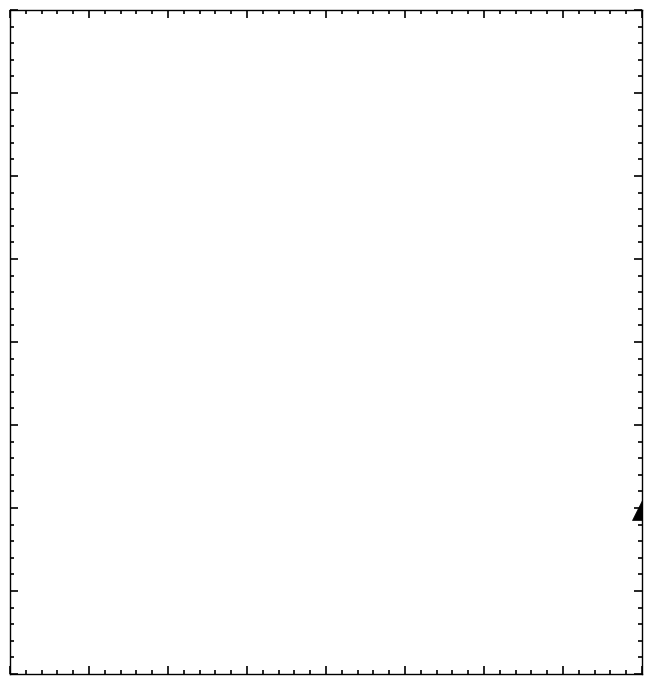

In [18]:
fig = plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax0=fig.add_subplot(111)
ax0.plot(RREL,VRAD,'^', color = 'k', markersize=30, markeredgecolor='k')
ax0.set_ylim(-400,400)
ax0.set_xlim(400,1200)
#ax0.set_xticklabels([])
#ax0.set_yticklabels([])
#ax0.set_xlabel(u'$tiempo$ $[Gyr]$', fontsize=26)
#ax0.set_ylabel(u'$A_{2}^{max}$', fontsize=26)
ax0.minorticks_on()
ax0.tick_params( labelsize=22)
ax0.tick_params('both', length=3, width=1.2,which='minor')
ax0.tick_params('both', length=6, width=1.2,which='major')
fig.savefig('/home/ornela/python/APOSTLE/figure.png', transparent= 'True', dpi = 100)

In [6]:
?plt.plot